# Lung Adenocarcinoma - Mutated Genes

Lung adenocarcinoma is the most common type of lung cancer in non-smokers. 

Data was obtained from the Catalogue of Somatic Mutations in Cancer (COSMIC). It is based on the most recent reference human genome, GRCh38.

I was able to access this data through creating an account on the COSMIC website, linked to my institution, The University of York, where I am currently a student.

This notebook is a personal mini-project where I will aim to practice my data analysis skills by exploring this dataset and plotting some graphs.

Due to licensing restrictions, the dataset used, 'cosmic_genes_with_mutation' must be downloaded separately from cancer.sanger.ac.uk.

The image below shows the settings I used from the cancer browser to obtain the data.

To run the notebook, please make sure the .csv is called 'cosmic_genes_with_mutation', and in a folder called 'lung_data'.

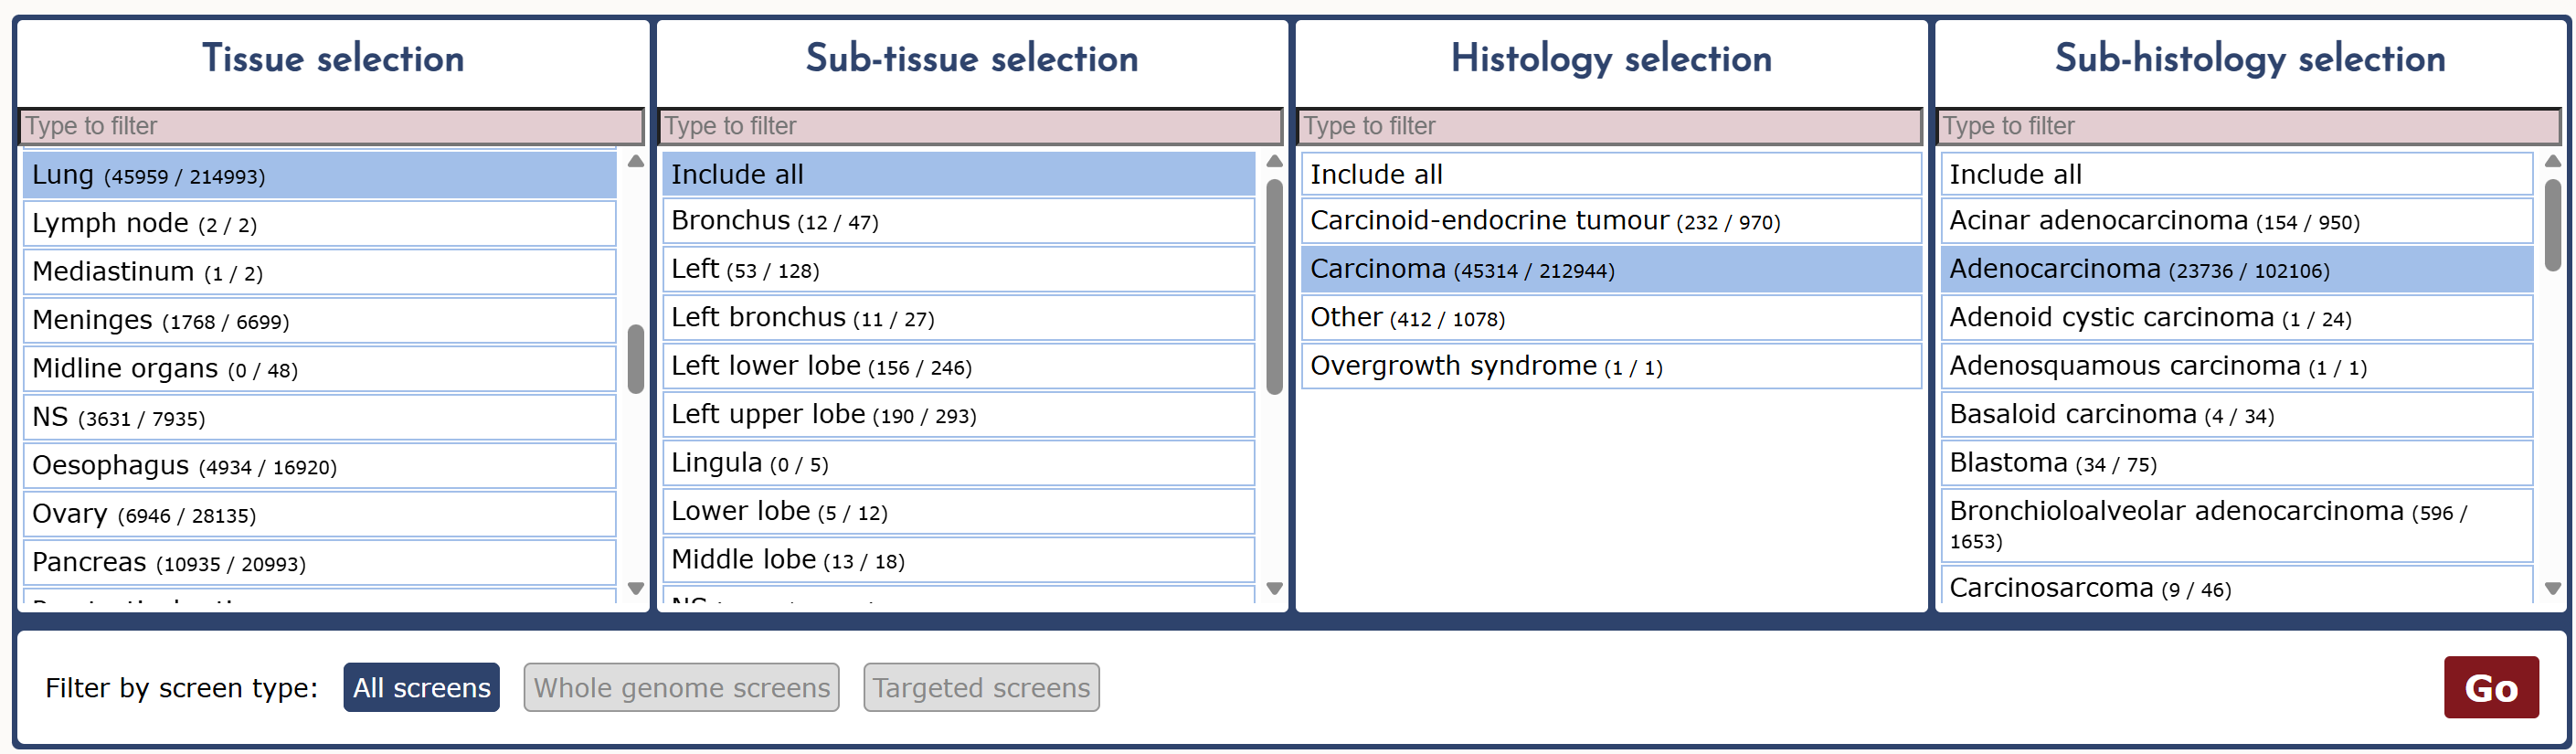

# Importing Libraries

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Packages loaded successfully")

Packages loaded successfully


# Reading in the Dataset

In [2]:
lung_data_filepath = Path("lung_data") / "cosmic_genes_with_mutation.csv"
lung_data = pd.read_csv(lung_data_filepath, index_col="Gene name")

In [3]:
# Checking out the basic structure of the dataset
lung_data.shape
# The data contains 3 columns and 54714 rows

(54714, 2)

In [4]:
# Displaying the first few rows of the dataset
lung_data.head()

,Mutated samples,Samples tested
Gene name,,
EGFR,16529,51715
EGFR_ENST00000454757,4089,51715
EGFR_ENST00000638463,4082,51715
EGFR_ENST00000455089,4078,51715
KRAS_ENST00000311936,3840,21548


The number of samples tested differs between each gene. This is because the dataset is comprised of whole genome sequences and targeted sequencing of specific genes.

It looks like a lot of the genes are going to be repeated due to different isoforms being studied.

I don't want to take into account duplicate results, so I'll delete them. I want to focus on the primary genes as a whole.

In [5]:
# Removing rows where gene names contain underscores - these are indicating isoforms
lung_data_clean = lung_data[~lung_data.index.str.contains('_', na=False)]

print(f"Original dataset shape: {lung_data.shape}")
print(f"Cleaned dataset shape: {lung_data_clean.shape}")
print(f"Removed {lung_data.shape[0] - lung_data_clean.shape[0]} rows containing underscores")

lung_data_clean.head()

Original dataset shape: (54714, 2)
Cleaned dataset shape: (18896, 2)
Removed 35818 rows containing underscores


,Mutated samples,Samples tested
Gene name,,
EGFR,16529,51715
KRAS,3549,21548
TP53,2329,5879
TTN,584,1440
STK11,567,5626


In [6]:
# Checking for missing values in the cleaned dataset
lung_data_clean.isnull().sum()
# Doesn't look like there are any missing values

Mutated samples    0
Samples tested     0
dtype: int64

# Summary Statistics

In [7]:
lung_data_clean.describe()

,Mutated samples,Samples tested
count,18896.000000,18896.000000
mean,23.191099,1458.623677
std,127.627321,524.664364
min,1.000000,1401.000000
25%,7.000000,1401.000000
50%,14.000000,1401.000000
75%,26.000000,1401.000000
max,16529.000000,51715.000000


# Creating a new column - Mutation Frequency

In [8]:
lung_data_with_freq = lung_data_clean.copy()
lung_data_with_freq['Mutation Frequency (%)'] = (lung_data_with_freq['Mutated samples'] / lung_data_with_freq['Samples tested']) * 100

lung_data_with_freq

,Mutated samples,Samples tested,Mutation Frequency (%)
Gene name,,,
EGFR,16529,51715,31.961713
KRAS,3549,21548,16.470206
TP53,2329,5879,39.615581
TTN,584,1440,40.555556
STK11,567,5626,10.078208
...,...,...,...
SLC35G4,1,1401,0.071378
ANKDD1B,1,1401,0.071378
WDR82,1,1401,0.071378


Getting the 5 genes with the highest mutation frequency across samples tested

In [9]:
top5_genes = lung_data_with_freq.sort_values('Mutation Frequency (%)', ascending=False).head(5)
top5_genes

,Mutated samples,Samples tested,Mutation Frequency (%)
Gene name,,,
TTN,584,1440,40.555556
TP53,2329,5879,39.615581
PCDHGA1,546,1401,38.972163
PCDHGA2,528,1401,37.687366
MUC16,533,1479,36.037863


# Data Visualization

Plotting the mutation frequency of the top 5 genes identified

C:\Users\willp\AppData\Local\Temp\ipykernel_10300\1320371009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_genes['Mutation Frequency (%)'], y=top5_genes.index, palette='rocket')


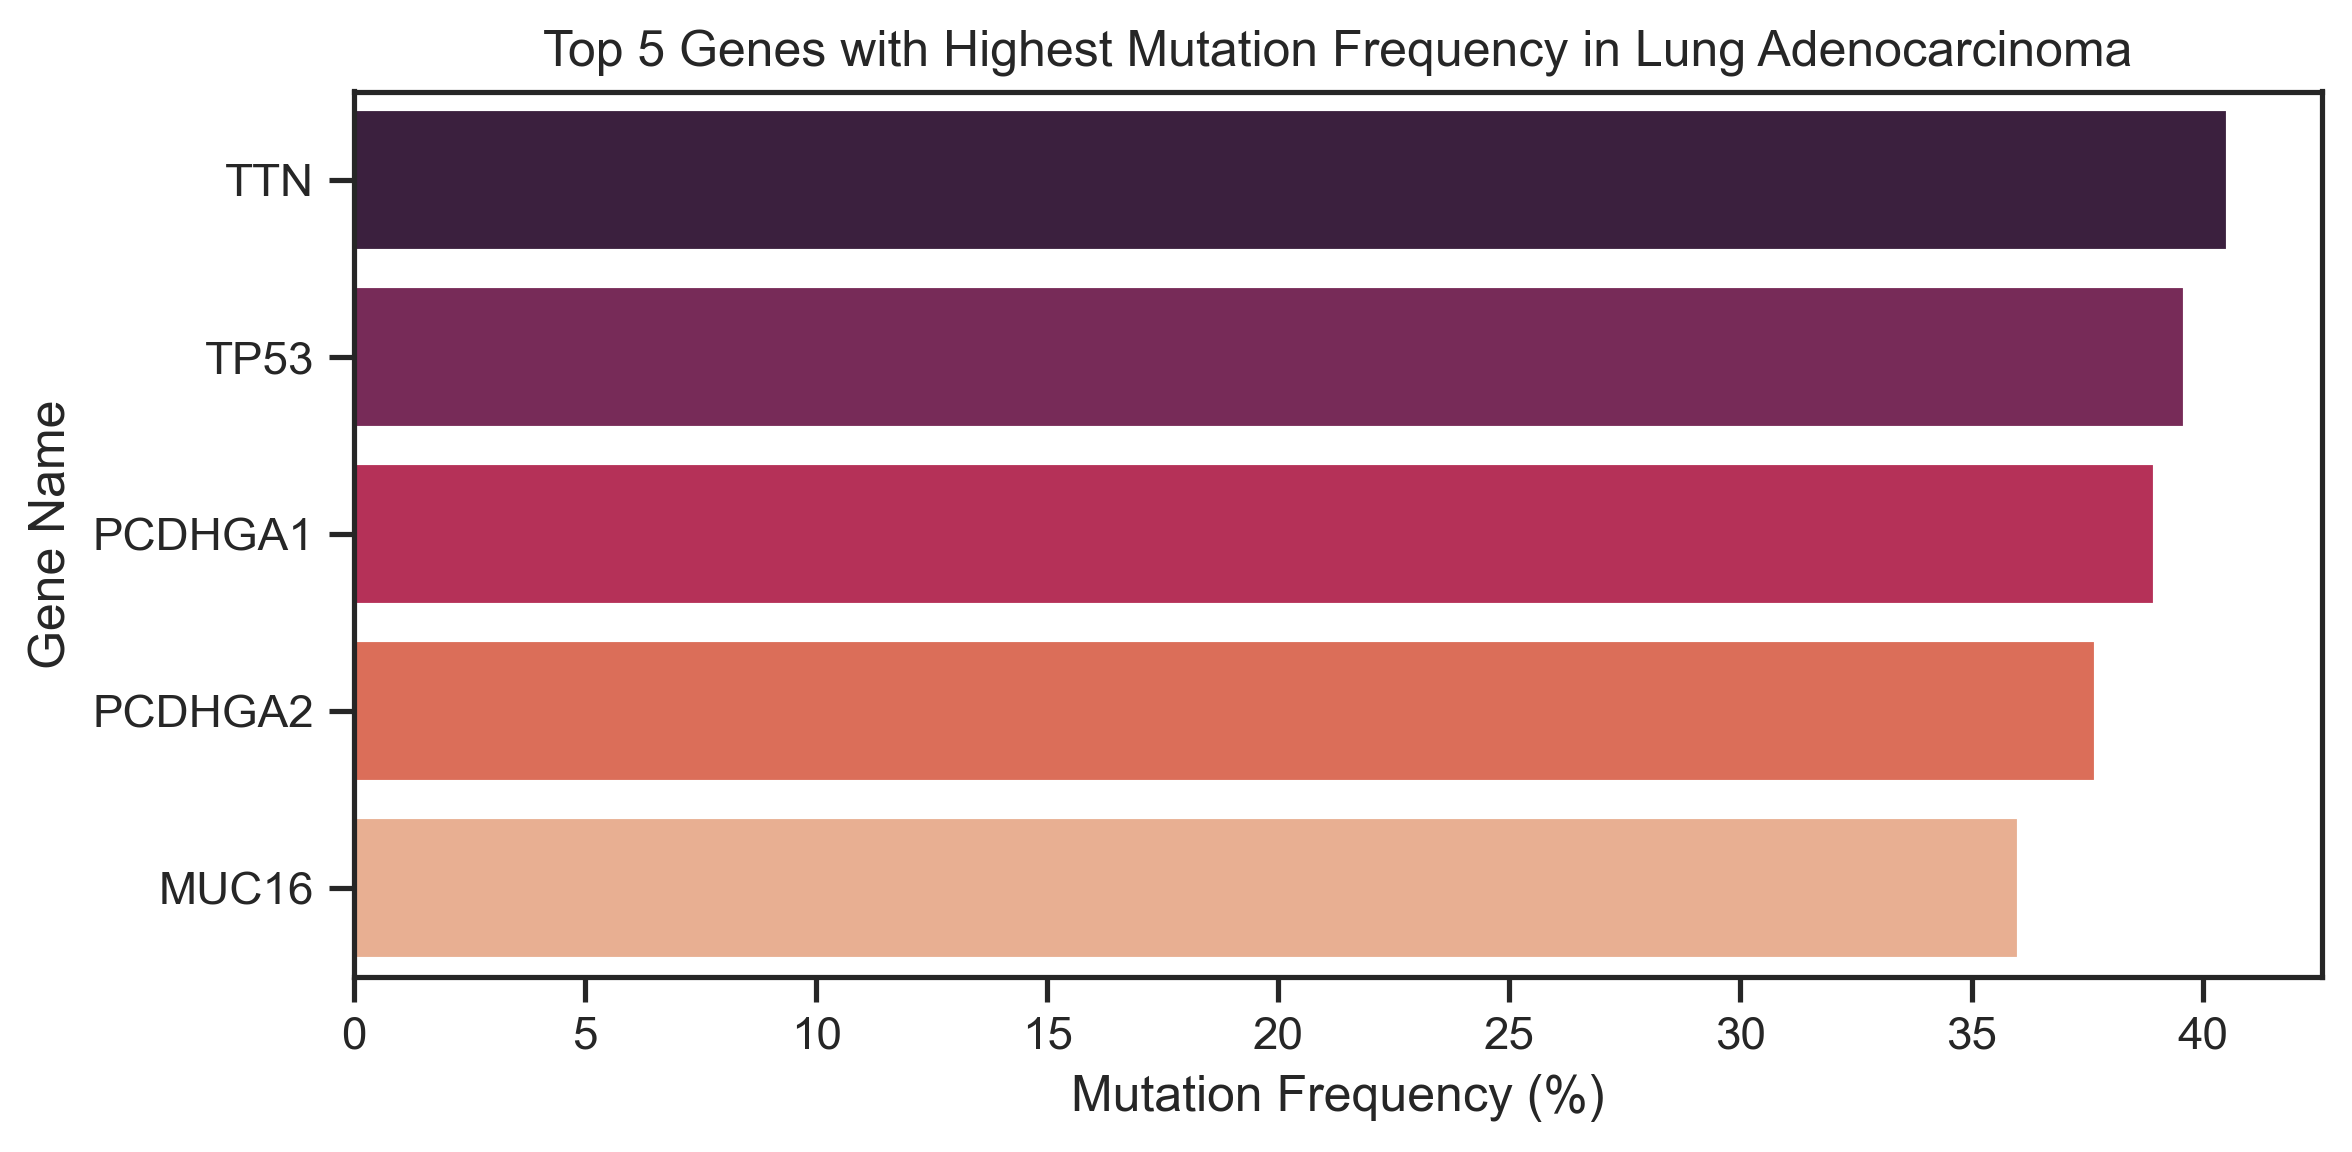

In [10]:
# Setting up the plot
sns.set(rc={"figure.dpi": 300})
sns.set_style("ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=top5_genes['Mutation Frequency (%)'], y=top5_genes.index, palette='rocket')
plt.xlabel('Mutation Frequency (%)'),
plt.ylabel('Gene Name'),
plt.title('Top 5 Genes with Highest Mutation Frequency in Lung Adenocarcinoma'),
plt.grid(False),
plt.tight_layout(),
plt.show()

Expected TP53 to be high due to its role in tumour suppression, but not TTN - this gene is involved in muscle function. 

It is possible this is a passenger mutation that co-occurs with P53 mutation?

Additionally, TTN is the largest gene in the human genome. It is possible that due to the size of the gene, it is more likely for silent mutations to occur, and then be detected in genome sequencing such as that used to obtain this dataset.